# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import plotly.figure_factory as ff

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [53]:
#seu código aqui
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
df_y_test = pd.read_csv("y_test.csv", delimiter=',')
df_y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

In [54]:
print("Colunas em y_test.csv:", df_y_test.columns)
print("Colunas em y_train_balanced.csv:", df_y_train.columns)

Colunas em y_test.csv: Index(['Credit Score'], dtype='object')
Colunas em y_train_balanced.csv: Index(['Credit Score'], dtype='object')


In [32]:
X_test

,Age,Income,Number of Children,Gender_Male,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Single,Home Ownership_Rented
0,26,50.0,0,False,False,False,False,False,True,True
1,53,115.0,0,True,False,False,False,False,False,False
2,40,130.0,0,True,False,False,True,False,True,False
3,36,105.0,0,True,False,True,False,False,True,False
4,36,95.0,2,False,False,False,False,True,False,False
5,36,125.0,0,True,False,False,True,False,False,False
6,30,100.0,2,True,False,False,False,True,False,False
7,35,90.0,1,False,False,True,False,False,False,False
8,31,65.0,0,True,True,False,False,False,True,True
9,49,77.5,1,False,False,True,False,False,False,False


In [33]:
X_train

,Age,Income,Number of Children,Gender_Male,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Single,Home Ownership_Rented
0,32,85.000000,0,True,False,False,False,True,True,True
1,37,72.500000,2,False,True,False,False,False,False,False
2,34,45.000000,0,True,False,False,False,False,True,True
3,34,47.500000,0,True,False,False,False,False,True,True
4,38,67.500000,2,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
250,29,27.500000,0,False,False,False,True,False,True,True
251,34,30.546101,0,False,False,False,False,False,True,True
252,28,29.582550,0,False,False,False,True,False,True,True
253,27,33.083599,0,False,False,False,True,False,True,True


In [34]:
df_y_test

,Credit Score
0,Average
1,High
2,High
3,High
4,High
5,High
6,High
7,High
8,Average
9,High


In [35]:
df_y_train

,Credit Score
0,High
1,High
2,Average
3,Average
4,High
...,...
250,Low
251,Low
252,Low
253,Low


In [36]:
print(df_y_train.value_counts())

Credit Score
Average         85
High            85
Low             85
Name: count, dtype: int64


###y_train está balanceada como pedida no exercício anteriormente utilizando a função SMOTE, a base de teste não está balanceada, pois se trata de dados que serão testados. Desta forma a maior importância é que os dados de treino estejam corretamente balanceados para o modelo de previsão.

# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [37]:
#seu código aqui
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, df_y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [38]:
y_pred_test = naive_bayes.predict(X_test)

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [47]:
#seu código aqui
y_pred_train = naive_bayes.predict(X_train)
accuracy = accuracy_score(df_y_train, y_pred_train)
recall = recall_score(df_y_train, y_pred_train, average='macro')
print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 0.9725490196078431
Recall: 0.9725490196078431


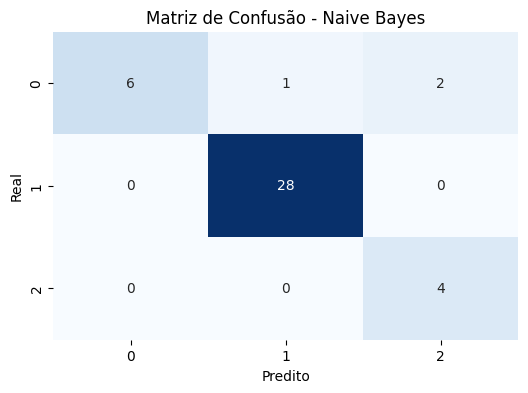

In [55]:
cm = confusion_matrix(df_y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

####Os valores mais importantes em uma matriz de confusão são os que estão na diagonal, pois eles representam as previsões corretas. Os valores fora da diagonal são as previsões incorretas.

##Primeira linha (Real 0):

O modelo previu corretamente 6 amostras como sendo da classe 0.

Ele errou 1 vez, classificando uma amostra da classe 0 como sendo da classe 1.

Ele errou 2 vezes, classificando amostras da classe 0 como sendo da classe 2.

##Segunda linha (Real 1):

O modelo classificou corretamente 28 amostras como sendo da classe 1.

Não houve erros para a classe 1. Ele não classificou amostras da classe 1 como 0 ou 2.

##Terceira linha (Real 2):

O modelo classificou corretamente 4 amostras como sendo da classe 2.

Não houve erros para a classe 2. Ele não classificou amostras da classe 2 como 0 ou 1.

Em resumo, a matriz de confusão mostra que o modelo Naive Bayes teve um desempenho muito bom na classificação das classes 1 e 2, mas teve algumas dificuldades com a classe 0.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [41]:
#seu código aqui
y_pred_test = naive_bayes.predict(X_test)
accuracy_test = accuracy_score(df_y_test, y_pred_test)
recall_test = recall_score(df_y_test, y_pred_test, average='macro')
print("Acurácia (Teste):", accuracy_test)
print("Recall (Teste):", recall_test)

Acurácia (Teste): 0.926829268292683
Recall (Teste): 0.8888888888888888


###Na base de treino a acurácia apresenta 97.2%, e o recall também, porém para teste apresenta um valor a baixo como:

####*   Acurácia: 92.6%
####*   Recall: 88.8%

###Para mim o teste está se ajustando ao modelo e necessita de mais dados para ter um resultado melhor, mesmo já nos apresentando um bom resultado, desta forma acredito que o modelo está bem atualmente porém pode melhorar com mais dados.



# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.



###Neste projeto o principal objetivo é utilizar o algoritmo de machine learning de Naive Bayes, como sabemos o algoritimo trata com idependência cada característica para fazer previsões. No caso deste projeto se trata sobre uma base de crédito que fará a previsão se os novos clientes que entrarão terão um score de credito baixo, médio ou alto.
###Se trata de três possibilidades diferentes, porém o modelo se apresentou de uma forma muito boa para realizar previsões, principalmente na base de treino e na base de teste como foi descrito mais a cima.
###O objetivo principal de aplicarmos o algoritmo de Naive Bayes neste caso é por que ele é um classificador probabilístico que vai calcular a probabilidade de uma determinada classe com base na combinação de diferentes atributos e isto permite não só a obtenção de uma classificação, mas também entende o grau de certeza da previsão realizada.